In [1]:

import pandas as pd

In [2]:

import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import math as m
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:

df = pd.read_csv('G:/delivery_time.csv')

In [4]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# *EDA*

In [6]:
df.shape

(21, 2)

In [7]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

# No requirement of transformation or dtype correction

In [9]:

#check for missing values
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: >

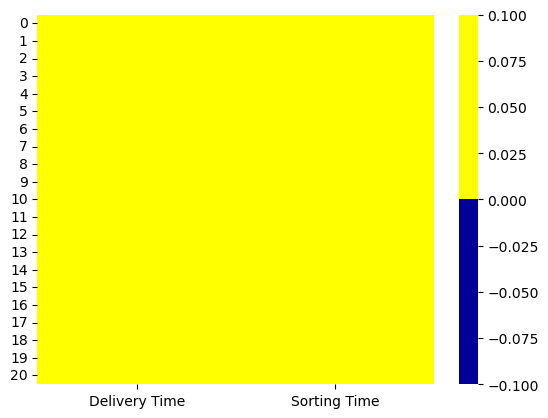

In [10]:

#to genrate heat map
import seaborn as sns
cols = df.columns
colors = ['#000099', '#ffff00']   #define colors, yellow for  non missing, blue for missing
sns.heatmap(df[cols].isnull(),
               cmap= sns.color_palette(colors))

### Hence we can conclude no missing values


In [11]:

#to check for duplicate rows
df[df.duplicated()].shape

(0, 2)

No duplicate rows

In [12]:


df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Outlier Detection


{'whiskers': [<matplotlib.lines.Line2D at 0x2687e2f15a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2687e2f1ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2687e2f1300>],
 'medians': [<matplotlib.lines.Line2D at 0x2687e2f2020>],
 'fliers': [<matplotlib.lines.Line2D at 0x2687e2f22c0>],
 'means': []}

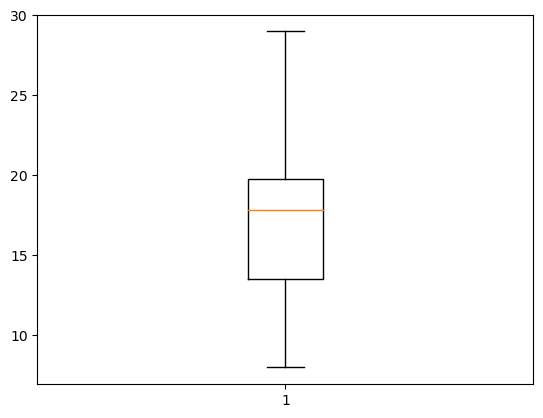

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(df['Delivery Time'])

In [14]:

#Renaming all columns
data = df.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis = 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_20040\3708463542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

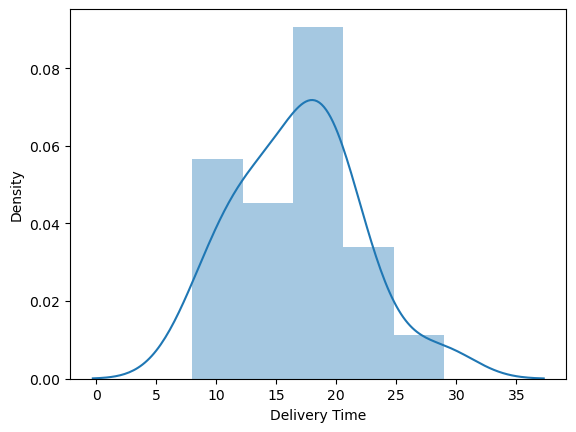

In [15]:

sns.distplot(df['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2680058e5f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2680058ea10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2680058e350>],
 'medians': [<matplotlib.lines.Line2D at 0x2680058ef50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2680058f1f0>],
 'means': []}

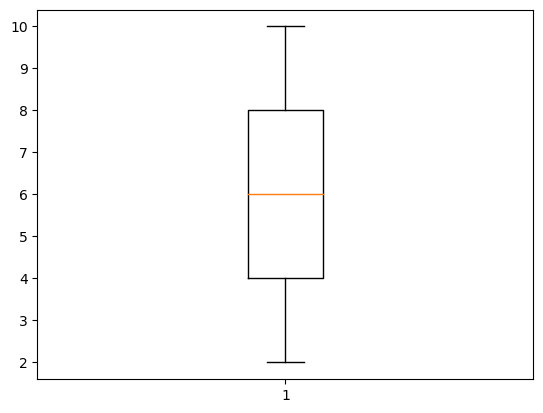

In [16]:


plt.boxplot(df['Sorting Time'])

C:\Users\hp\AppData\Local\Temp\ipykernel_20040\1158283534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

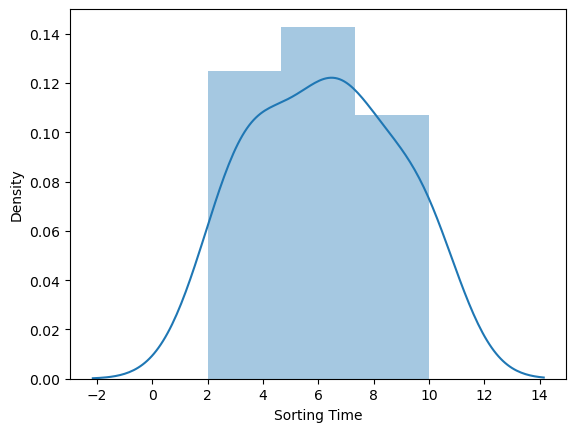

In [17]:
sns.distplot(df['Sorting Time'])     

# Here, we can coclude there are no outliers.

In [18]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

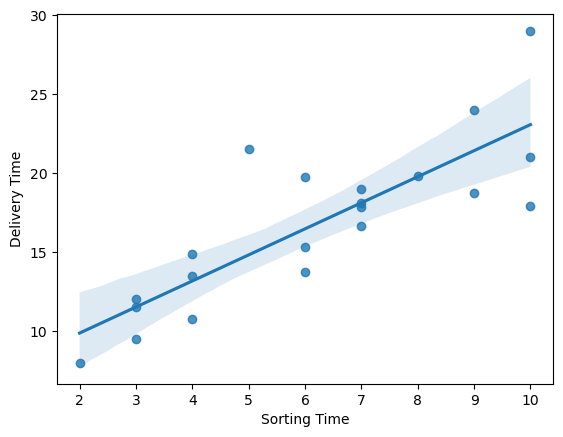

In [19]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])

### Model Testing

In [20]:
#X = df.iloc[:, 0:-1].values
X = df.iloc[:, 0:1].values
y = df.iloc[:,1].values

In [21]:
model = LinearRegression()
model_train = model.fit(X,y)
print(model)

LinearRegression()


In [22]:
##Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=.7, test_size=.3, random_state=0)

In [23]:
X_train

array([[ 8.  ],
       [19.  ],
       [17.83],
       [29.  ],
       [19.75],
       [15.35],
       [13.75],
       [18.75],
       [ 9.5 ],
       [18.11],
       [24.  ],
       [21.  ],
       [14.88],
       [16.68]])

In [24]:

model = model.fit(X,y)# 70% data, ready for predictopn wrt X_test
print("model Training Completed")

model Training Completed


In [25]:
X_test

array([[17.9 ],
       [11.5 ],
       [21.5 ],
       [13.5 ],
       [10.75],
       [19.83],
       [12.03]])

In [26]:
model.coef_

array([0.41374363])

In [27]:
y_predict = model.predict(X_test)
y_predict

array([6.64933758, 4.00137836, 8.13881464, 4.82886561, 3.69107064,
       7.44786278, 4.22066248])

In [28]:
y_test

array([10,  3,  5,  4,  4,  8,  3], dtype=int64)

In [29]:
model.intercept_

-0.7566733660351259

In [30]:
pred = model_train.predict(X)
pred

array([ 7.93194282,  4.82886561,  7.41476329,  9.17317371, 11.24189185,
        5.59429132,  7.10445557,  3.1738911 ,  6.64933758,  7.00101966,
        7.44786278,  3.69107064,  6.14457035,  4.00137836,  4.22066248,
        5.39983182,  4.93230152,  6.73622374,  2.55327566,  6.62037552,
        8.13881464])

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([6.64933758, 4.00137836, 8.13881464, 4.82886561, 3.69107064,
       7.44786278, 4.22066248])

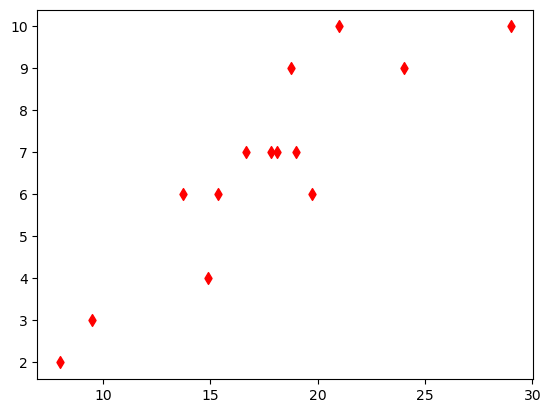

In [33]:
import matplotlib.pyplot as plt
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red', marker='d')
# plot the regression line

#plt.title('Salary vs Experience (Training set)')
#plt.xlabel('Years of Experience')
#plt.ylabel('Salary')
#plt.show()

In [34]:
np.mean((y_test - y_pred)**2)

3.522740367749802

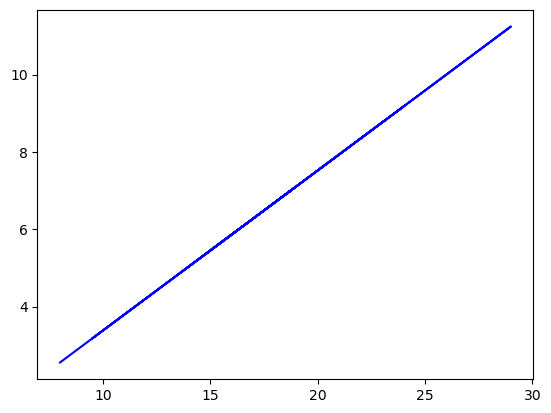

In [35]:
plt.plot(X_train, model.predict(X_train), color='blue')

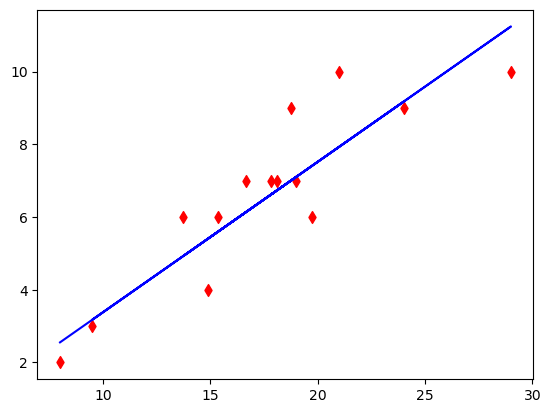

In [36]:
plt.scatter(X_train, y_train, color = 'red', marker='d')
plt.plot(X_train, model.predict(X_train), color='blue')

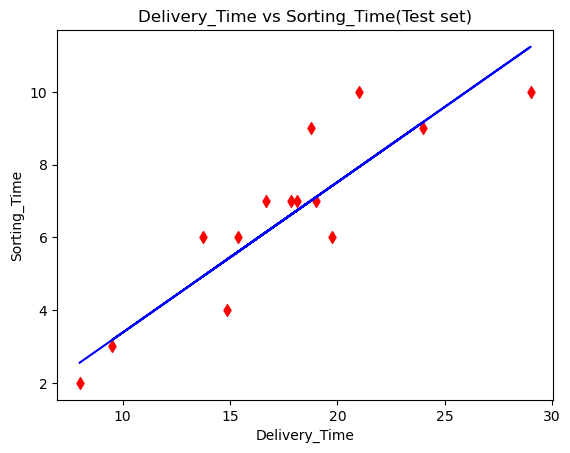

In [37]:
import matplotlib.pyplot as plt
# plot the actual data points of test set
plt.scatter(X_train, y_train, color = 'red', marker='d')
# plot the regression line (same as above)
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Delivery_Time vs Sorting_Time(Test set)')
plt.xlabel('Delivery_Time')
plt.ylabel('Sorting_Time')
plt.show()

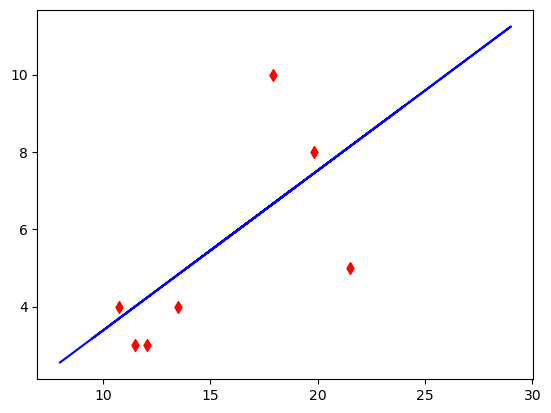

In [38]:

plt.scatter(X_test, y_test, color = 'red', marker='d')

plt.plot(X_train, model.predict(X_train), color='blue')

In [39]:
model.score(X_test,y_test)


0.4321898749350648

In [40]:
X= df.iloc[:,:-1] #independent feature
Y= df.iloc[:,-1] #dependent feature

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,y,scoring = 'neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-2.4135844337620758


In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regressor=Ridge()

In [61]:
parameters= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,0.1,0.001,0.0001]}
ridge_regressor= GridSearchCV(Ridge(),parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 0.1, 0.001,
                                   0.0001]},
             scoring='neg_mean_squared_error')

In [62]:
print(ridge_regressor.best_params_)

{'alpha': 45}


In [63]:
print(ridge_regressor.best_score_)

-1.737969238941254


In [53]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [64]:
ridge_pred=ridge_regressor.predict(X_test)

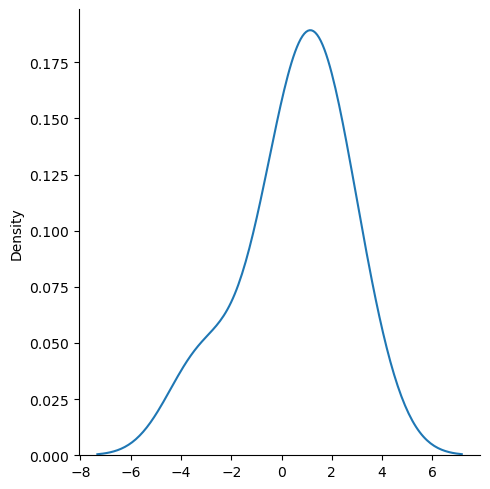

In [65]:
import  seaborn as sns
sns.displot(ridge_pred-y_test,kind= "kde")

In [66]:
score= r2_score(ridge_pred,y_test)

In [67]:
score

-0.780151650135712